In [1]:
from IPython.core.display import display, HTML
display(HTML(
"""<style>
div.container{width:99% !important;}
div.CodeMirror {font-family:Consolas; font-size:18pt;}
div.output{font-size:18pt; font-weight:bold;}
div.input{font-family:Consolas; font-size:18pt;}
div.prompt{min-width:100px;}
</style>"""))

# 1. tensorflow v2.x에서 v1 버전 사용하기

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# v1로 사용하기

Instructions for updating:
non-resource variables are not supported in the long term


In [6]:
# tensor=data(상수, 변수), 연산
# node1 상수 tensor 선언
node1 = tf.constant('Hello, TensorFlow') 
# graph(computational grahp를 생성)
sess = tf.Session()
# print(node1)
print(sess.run(node1)) # b가 의미하는 것은 byte literals
# http://stackoverflow.com/questions/6269765
print(sess.run(node1).decode())

b'Hello, TensorFlow'
Hello, TensorFlow


In [10]:
# 간단한 수학 연산 수행(computational graph)
node1 = tf.constant(10, dtype=tf.float32)
node2 = tf.constant(20, dtype=tf.float32)
# node3 = node1 + node2
node3 = tf.add(node1, node2)
# computational graph 실행
sess = tf.Session()
print(sess.run([node1, node2, node3]))

[10.0, 20.0, 30.0]


# Tensorflow 
<ol>
    <li>그래프 정의</li>
    <li>sess = tf.Session()를 실행</li>
    <li>sess.run()을 통해 값을 확인할 수 있음</li>

In [13]:
import numpy as np
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
print(sess.run(node1))
print(sess.run(node2))

[1 2 3]
[1. 2. 3.]


In [14]:
data = [1.,2.,3.,4.]
m = tf.reduce_mean(data) # reduce_mean 평균값 연산
sess = tf.Session()
print(sess.run(m))

2.5


# 2. tensorflow v1을 이용한 linear regression을 구현

## 독립변수 x가 한개

In [16]:
# tensor graph 정의

# train data set
# x = np.array([1,2,3])
# y = np.array([1,2,3])
x = [1,2,3]
y = [1,2,3]

#Weight & Bias (처음에는 랜덤값을 셋팅했다가 학습과정에서 변경)
W = tf.Variable(tf.random.normal([1]), name="weight")
b = tf.Variable(tf.random.normal([1]), name="bias")

# Hypothesis
H = W*x + b

# cost function(최소제곱법)
cost = tf.reduce_mean(tf.square(H - y))

# 우리의 목적은 cost함수가 최소가 되는 W와 b를 찾는 것
'''
cost함수는 제곱의 평균인 2차 함수이므로 곡선. 곡선위 미분값이 줄어드는 방향으로 학습
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Session 
sess = tf.Session()

# Variable 노드 초기화
sess.run(tf.global_variables_initializer())

# 6000번 학습 (tensorflow v2. fit()함수)
'''
for step in range(1, 6001):
    sess.run(train)
    if step%300 == 0:
        print("{}번째 cost:{}, W값:{}, b값:{}".format(step, 
                        sess.run(cost), sess.run(W), sess.run(b)))
'''
for step in range(1, 6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    if step%200 == 0:
        print("{}번째 cost:{}, W값:{}, b값:{}".format(step,
                        cost_val, W_val, b_val))

200번째 cost:0.02034815587103367, W값:[0.8347227], b값:[0.3757142]
400번째 cost:0.007769936695694923, W값:[0.8978686], b값:[0.23216864]
600번째 cost:0.0029669369105249643, W값:[0.93688905], b값:[0.14346603]
800번째 cost:0.0011329210828989744, W값:[0.96100134], b값:[0.08865321]
1000번째 cost:0.0004326040216255933, W값:[0.9759012], b값:[0.05478227]
1200번째 cost:0.0001651893398957327, W값:[0.98510844], b값:[0.0338521]
1400번째 cost:6.307666626526043e-05, W값:[0.990798], b값:[0.02091847]
1600번째 cost:2.4085305994958617e-05, W값:[0.9943137], b값:[0.0129263]
1800번째 cost:9.197224244417157e-06, W값:[0.9964861], b값:[0.00798776]
2000번째 cost:3.5120513075526105e-06, W값:[0.9978286], b값:[0.00493609]
2200번째 cost:1.3411639656624175e-06, W값:[0.9986581], b값:[0.00305028]
2400번째 cost:5.1229693553978e-07, W값:[0.9991708], b값:[0.00188511]
2600번째 cost:1.9572318876726058e-07, W값:[0.9994874], b값:[0.00116518]
2800번째 cost:7.483316011303032e-08, W값:[0.99968296], b값:[0.00072048]
3000번째 cost:2.8660439355121525e-08, W값:[0.9998037], b값:[0.00044579]

In [17]:
sess.run([W,b])

[array([0.99999774], dtype=float32), array([4.4902276e-06], dtype=float32)]

In [20]:
w_, b_ = sess.run([W,b])

In [21]:
print("최종적으로 나온 회귀식 : H={}*x + {}".format(w_[0], b_[0]))

최종적으로 나온 회귀식 : H=0.9999977350234985*x + 4.490227638598299e-06


In [32]:
# tensor graph 정의

# train data set
# x = np.array([1,2,3])
# y = np.array([1,2,3])
x = [1,2,3]
y = [1,2,3]

#Weight & Bias (처음에는 랜덤값을 셋팅했다가 학습과정에서 변경)
W = tf.Variable(100.0, name="weight")
b = tf.Variable(tf.random.normal([1]), name="bias")

# Hypothesis
H = W*x + b

# cost function(최소제곱법)
cost = tf.reduce_mean(tf.square(H - y))

# 우리의 목적은 cost함수가 최소가 되는 W와 b를 찾는 것
'''
cost함수는 제곱의 평균인 2차 함수이므로 곡선. 곡선위 미분값이 줄어드는 방향으로 학습
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Session 
sess = tf.Session()

# Variable 노드 초기화
sess.run(tf.global_variables_initializer())

# 4000번 학습 (tensorflow v2. fit()함수)
for step in range(1, 4001):
    W_val, b_val = sess.run([W, b])
    if step%200 == 1:
        print("{}번째 cost:{}, W값:{}, b값:{}".format(step,
                        cost_val, W_val, b_val[0]))
    sess.run(train)

1번째 cost:3.243232722313638e-12, W값:100.0, b값:1.9055131673812866
201번째 cost:3.243232722313638e-12, W값:10.484940528869629, b값:-21.561498641967773
401번째 cost:3.243232722313638e-12, W값:6.861116886138916, b값:-13.323695182800293
601번째 cost:3.243232722313638e-12, W값:4.6218132972717285, b값:-8.233232498168945
801번째 cost:3.243232722313638e-12, W값:3.2380611896514893, b값:-5.0876383781433105
1001번째 cost:3.243232722313638e-12, W값:2.3829853534698486, b값:-3.143850803375244
1201번째 cost:3.243232722313638e-12, W값:1.8546011447906494, b값:-1.942708969116211
1401번째 cost:3.243232722313638e-12, W값:1.528091549873352, b값:-1.2004761695861816
1601번째 cost:3.243232722313638e-12, W값:1.3263286352157593, b값:-0.7418213486671448
1801번째 cost:3.243232722313638e-12, W값:1.2016510963439941, b값:-0.45840057730674744
2001번째 cost:3.243232722313638e-12, W값:1.1246082782745361, b값:-0.28326380252838135
2201번째 cost:3.243232722313638e-12, W값:1.0770002603530884, b값:-0.17503969371318817
2401번째 cost:3.243232722313638e-12, W값:1.04758143424

## 2.1 predict를 하기 위한 placeholder 이용

In [34]:
# placeholder 이용
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
#ab = tf.add(a+b)
ab = a + b
sess = tf.Session()
sess.run(ab, feed_dict={a:10, b:20})

30.0

In [35]:
sess.run(ab, feed_dict={a : [1,2,3],
                        b : [10,10,10]})

array([11., 12., 13.], dtype=float32)

In [36]:
sess.run(ab, feed_dict={a : np.array([1,2,3]),
                        b : np.array([10,10,10])})

array([11., 12., 13.], dtype=float32)

In [37]:
# 그래프 실행 단계에서 값을 던져줌
node1 = tf.placeholder(tf.float32)
node2 = tf.placeholder(tf.float32)
adder_node = node1 + node2
sess = tf.Session()
result = sess.run(adder_node, feed_dict={node1: input("node1값은 "),
                                         node2: input("node2값은 ")})
print(result)

node1값은 10
node2값은 20
30.0


In [39]:
# training data set (H = 2x + 3)
x_data = [1, 2, 3]
y_data = [5, 7, 9]

# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")
# Hypothesis
H = W*x + b

# cost function
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], 
                                feed_dict={x:x_data, y:y_data})
    if step%200==0:
        print("{}번째:cost-{}, W-{}, b-{}".format(step, 
                                                cost_val, W_val, b_val))

200번째:cost-0.4143863618373871, W-[2.7458534], b-[1.3045001]
400번째:cost-0.15823297202587128, W-[2.4608922], b-[1.9522841]
600번째:cost-0.06042104586958885, W-[2.2848032], b-[2.3525755]
800번째:cost-0.02307167463004589, W-[2.1759908], b-[2.5999315]
1000번째:cost-0.008809849619865417, W-[2.1087515], b-[2.7527826]
1200번째:cost-0.0033639955800026655, W-[2.0672016], b-[2.847235]
1400번째:cost-0.0012845421442762017, W-[2.0415266], b-[2.9056]
1600번째:cost-0.000490499020088464, W-[2.0256605], b-[2.9416676]
1800번째:cost-0.0001872936263680458, W-[2.0158567], b-[2.963954]
2000번째:cost-7.151949830586091e-05, W-[2.0097985], b-[2.977726]
2200번째:cost-2.731233871600125e-05, W-[2.006055], b-[2.9862354]
2400번째:cost-1.0431122063891962e-05, W-[2.0037422], b-[2.9914935]
2600번째:cost-3.985328476119321e-06, W-[2.0023131], b-[2.9947422]
2800번째:cost-1.5233372323564254e-06, W-[2.0014303], b-[2.9967487]
3000번째:cost-5.837588901158597e-07, W-[2.0008855], b-[2.9979882]
3200번째:cost-2.236000256061743e-07, W-[2.0005481], b-[2.99875

In [41]:
sess.run([W, b])

[array([2.000026], dtype=float32), array([2.999942], dtype=float32)]

In [43]:
# 예측해보기(predict)
sess.run(H, feed_dict={x:5})

array([13.000072], dtype=float32)

In [44]:
sess.run(H, feed_dict={x: np.array([1,10,20])})

array([ 4.999968, 23.000202, 43.00046 ], dtype=float32)

## 2.2 scale이 다른 데이터들의 linear regression을 구현

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

In [6]:
# training data set (datadml scale이 다르면 학습 결과가 ?)
x_data = [1, 2, 5, 8,10]
y_data = [5,15,68,80,95]

# placeholder를 설정
x = tf.placeholder(dtype=tf.float32, shape=None)
y = tf.placeholder(dtype=tf.float32, shape=None)

# Weight & bias
W = tf.Variable(tf.random_normal([1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
H = W * x + b

# cost function
cost = tf.reduce_mean(tf.square(H - y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
# train     = optimizer.minimize(cost)

# session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 6001):
    _, cost_val, W_val = sess.run([train, cost, W], feed_dict={x:x_data,
                                                              y:y_data})
    if step%200 == 0 :
        print("{}번째 cost-{}, W-{}".format(step, cost_val, W_val))

200번째 cost-79.30921936035156, W-[10.059395]
400번째 cost-79.15502166748047, W-[10.129433]
600번째 cost-79.1408920288086, W-[10.150646]
800번째 cost-79.13957977294922, W-[10.157072]
1000번째 cost-79.13948822021484, W-[10.1590185]
1200번째 cost-79.13945770263672, W-[10.159608]
1400번째 cost-79.13945007324219, W-[10.159786]
1600번째 cost-79.13945007324219, W-[10.159841]
1800번째 cost-79.13945007324219, W-[10.159857]
2000번째 cost-79.13948059082031, W-[10.159862]
2200번째 cost-79.13945007324219, W-[10.1598625]
2400번째 cost-79.13945770263672, W-[10.1598625]
2600번째 cost-79.13945770263672, W-[10.1598625]
2800번째 cost-79.13945770263672, W-[10.1598625]
3000번째 cost-79.13945770263672, W-[10.1598625]
3200번째 cost-79.13945770263672, W-[10.1598625]
3400번째 cost-79.13945770263672, W-[10.1598625]
3600번째 cost-79.13945770263672, W-[10.1598625]
3800번째 cost-79.13945770263672, W-[10.1598625]
4000번째 cost-79.13945770263672, W-[10.1598625]
4200번째 cost-79.13945770263672, W-[10.1598625]
4400번째 cost-79.13945770263672, W-[10.1598625]
46

In [7]:
sess.run([W,b])

[array([10.1598625], dtype=float32), array([-0.23128414], dtype=float32)]

In [8]:
# 예측을 할 수 있으나 cost가 너무 큰 값이라 믿을 수 없음
sess.run(H, feed_dict={x:10})

array([101.36734], dtype=float32)

In [9]:
# 예측이 제대로 안 되는 이유 : GradientDescentOptimizer에서 local최소값을 만나면
# global 최소값이 따로 있어도 멈춤

# 3. 독립변수 x 가  여러개인 linear regression
- scale이 다른 x, y값(교안 pt.28)

In [14]:
# training data set
# x_data = [[73,80,75],
#           [93,88,93],
#           [89,91,90],
#           [96,98,100],
#           [73,66,70]]
# y_data = [[152],[185],[180],[196],[142]]
x_data = np.array([[73,80,75],
                   [93,88,93],
                   [89,91,90],
                   [96,98,100],
                   [73,66,70]])
y_data = np.array([[152],
                   [185],
                   [180],
                   [196],
                   [142]])

# placeholder 
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([3,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
# H = X @ W + b
H = tf.matmul(X, W) + b

# cost function
cost = tf.reduce_mean(tf.square(H - Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, 
                                                    Y : y_data})
    if step%3000 == 0 :
        print("{}번째 cost:{}".format(step, cost_val))

3000번째 cost:12.403375625610352
6000번째 cost:2.7397029399871826
9000번째 cost:0.820421576499939
12000번째 cost:0.42711812257766724
15000번째 cost:0.3361228108406067
18000번째 cost:0.30645254254341125
21000번째 cost:0.2904375493526459
24000번째 cost:0.2784835994243622
27000번째 cost:0.2684950530529022
30000번째 cost:0.25995779037475586
33000번째 cost:0.2525762915611267
36000번째 cost:0.2461874932050705
39000번째 cost:0.24065783619880676
42000번째 cost:0.2358899861574173
45000번째 cost:0.23174957931041718
48000번째 cost:0.2281590700149536
51000번째 cost:0.2250383198261261
54000번째 cost:0.22236569225788116
57000번째 cost:0.22004151344299316
60000번째 cost:0.21802644431591034


# 4. Ozone량 예측 예제
- 독립변수 x가 3 => Multi-variable Linear Regression

In [15]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import pandas as pd

In [47]:
# training data set 생성
# data load -> 결측치 처리 -> 독립변수, 종속변수 분리
data = pd.read_csv('./data/ozone.csv', sep=",")

# data를 바로 학습할 수 없음. 데이터 정제 작업 필요.
data = data.dropna(how='any') # 결측치가 한열이라도 있는 행 모두 제거

# 필요한 columns만 추출
data = data[['Ozone','Solar.R','Wind','Temp']]

# training data set
x_data = data[['Solar.R','Wind','Temp']].values # DataFrame을 numpy 배열로
y_data = data[['Ozone']].values.reshape(-1, 1)
x_data.shape, y_data.shape

# tensorflow 구현
# 1.placeholder
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 2. Weight & bias 설정
W = tf.Variable(tf.random_normal([3,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 3. Hypothesis
# H = X @ W + b
H = tf.matmul(X, W) + b

# 4. cost 함수
cost = tf.reduce_mean(tf.square(H - Y))

# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# 6. session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 7. 학습
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data,
                                                    Y:y_data})
    if step%3000 == 0:
        print("{}번째 cost {}".format(step, cost_val))

3000번째 cost 504.4783630371094
6000번째 cost 469.5782775878906
9000번째 cost 465.4649963378906
12000번째 cost 464.9571228027344
15000번째 cost 464.8715515136719
18000번째 cost 464.8354797363281
21000번째 cost 464.8051452636719
24000번째 cost 464.77557373046875
27000번째 cost 464.7461242675781
30000번째 cost 464.71673583984375
33000번째 cost 464.6874084472656
36000번째 cost 464.6579895019531
39000번째 cost 464.6286315917969
42000번째 cost 464.5992736816406
45000번째 cost 464.5699157714844
48000번째 cost 464.54052734375
51000번째 cost 464.5112609863281
54000번째 cost 464.4820251464844
57000번째 cost 464.452880859375
60000번째 cost 464.42376708984375


In [51]:
data[1:2]

,Ozone,Solar.R,Wind,Temp
1,36.0,118.0,8.0,72


In [52]:
sess.run(H, feed_dict={X:np.array([[118,8,72]])})

array([[41.639595]], dtype=float32)

In [ ]:
# scale 맞추는 방법 : normalization(많이 씀), standardization(표준화)
#                   X - Xmin
# normalization = ──────────────
#                  Xmax - Xmin
# 위의 식을 써도 되지만 라이브러리를 씀(sklearn.preprocessing.MinMaxScaler 이용)
#                    x - Xmean(평균)
# standardization = ────────────────
#                     Xstd(표준편차)
# 의 식을 써도 되지만 라이브러리 씀(sklearn.preprocessing.StandardScaler 이용)

In [58]:
# training data set 생성
# data load -> 결측치 처리 -> 독립변수, 종속변수 분리
data = pd.read_csv('./data/ozone.csv', sep=",")

# data를 바로 학습할 수 없음. 데이터 정제 작업 필요.
data = data.dropna(how='any') # 결측치가 한열이라도 있는 행 모두 제거

# 필요한 columns만 추출
data = data[['Ozone','Solar.R','Wind','Temp']]

# scale 조정(standardization)
#                    x - Xmean(평균)
# standardization = ────────────────
#                     Xstd(표준편차)
data['Ozone'] = (data['Ozone']- data['Ozone'].mean())/data['Ozone'].std()
data['Solar.R'] = (data['Solar.R']- data['Solar.R'].mean()) / data['Solar.R'].std()
data['Wind'] = (data['Wind']- data['Wind'].mean())/data['Wind'].std()
data['Temp'] = (data['Temp']- data['Temp'].mean())/data['Temp'].std()

# training data set
x_data = data[['Solar.R','Wind','Temp']].values # DataFrame을 numpy 배열로
y_data = data[['Ozone']].values.reshape(-1, 1)
x_data.shape, y_data.shape

# tensorflow 구현
# 1.placeholder
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 2. Weight & bias 설정
W = tf.Variable(tf.random_normal([3,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 3. Hypothesis
# H = X @ W + b
H = tf.matmul(X, W) + b

# 4. cost 함수
cost = tf.reduce_mean(tf.square(H - Y))

# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# 6. session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 7. 학습
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data,
                                                    Y:y_data})
    if step%3000 == 0:
        print("{:5d}번째 cost {}".format(step, cost_val))

 3000번째 cost 12.220887184143066
 6000번째 cost 10.340862274169922
 9000번째 cost 8.773386001586914
12000번째 cost 7.46511697769165
15000번째 cost 6.371936798095703
18000번째 cost 5.4573845863342285
21000번째 cost 4.691285610198975
24000번째 cost 4.04865837097168
27000번째 cost 3.508819580078125
30000번째 cost 3.054633378982544
33000번째 cost 2.6718876361846924
36000번째 cost 2.3487956523895264
39000번째 cost 2.075575351715088
42000번째 cost 1.8440885543823242
45000번째 cost 1.6475787162780762
48000번째 cost 1.4804233312606812
51000번째 cost 1.3379405736923218
54000번째 cost 1.2162208557128906
57000번째 cost 1.112007737159729
60000번째 cost 1.022579312324524


In [ ]:
# predict 하려면 scale이 맞춰진 데이터로 predict를 하고 결과를 다시 scale조정

In [69]:
# training data set 생성
# data load -> 결측치 처리 -> 독립변수, 종속변수 분리
data = pd.read_csv('./data/ozone.csv', sep=",")

# data를 바로 학습할 수 없음. 데이터 정제 작업 필요.
data = data.dropna(how='any') # 결측치가 한열이라도 있는 행 모두 제거

# 필요한 columns만 추출
data = data[['Ozone','Solar.R','Wind','Temp']]

# training data set
x_data = data[['Solar.R','Wind','Temp']].values # DataFrame을 numpy 배열로
y_data = data[['Ozone']].values.reshape(-1, 1)

print('scale 조정 전 데이터 : \n', np.c_[x_data[:3], y_data[:3]])
# scale 조정(1) sklearn.preprocessing.MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scale_x = MinMaxScaler() # scale_x : x_data를 scale조정할 객체
# x_data에 대한 설정을 잡는 부분 ; x_data 3개 컬럼에 대한 max, min 설정
scale_x.fit(x_data) 
x_data = scale_x.transform(x_data) # scale 조정된 x_data

scale_y = MinMaxScaler()
scale_y.fit(y_data)
y_data = scale_y.transform(y_data) # scale 조정된 y_data
print('scale 조정된 데이터 :\n', np.c_[x_data[:3], y_data[:3]])

# tensorflow 구현
# 1.placeholder
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 2. Weight & bias 설정
W = tf.Variable(tf.random_normal([3,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 3. Hypothesis
# H = X @ W + b
H = tf.matmul(X, W) + b

# 4. cost 함수
cost = tf.reduce_mean(tf.square(H - Y))

# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# 6. session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 7. 학습
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data,
                                                    Y:y_data})
    if step%3000 == 0:
        print("{:5d}번째 cost {}".format(step, cost_val))

scale 조정 전 데이터 : 
 [[190.    7.4  67.   41. ]
 [118.    8.   72.   36. ]
 [149.   12.6  74.   12. ]]
scale 조정된 데이터 :
 [[0.55963303 0.27717391 0.25       0.23952096]
 [0.33944954 0.30978261 0.375      0.20958084]
 [0.43425076 0.55978261 0.425      0.06586826]]
 3000번째 cost 0.07073533535003662
 6000번째 cost 0.06718307733535767
 9000번째 cost 0.06425295770168304
12000번째 cost 0.06182699650526047
15000번째 cost 0.05980963632464409
18000번째 cost 0.05812251195311546
21000번째 cost 0.05670461431145668
24000번째 cost 0.055504001677036285
27000번째 cost 0.05447942763566971
30000번째 cost 0.053599122911691666
33000번째 cost 0.052834492176771164
36000번째 cost 0.05216507986187935
39000번째 cost 0.05157206952571869
42000번째 cost 0.051041774451732635
45000번째 cost 0.050562936812639236
48000번째 cost 0.05012625455856323
51000번째 cost 0.049724020063877106
54000번째 cost 0.049349721521139145
57000번째 cost 0.048997651785612106
60000번째 cost 0.04866626113653183


In [71]:
# 8. prediction
input_data = np.array([[118., 8.,72.]])

In [72]:
scale_input_data = scale_x.transform(input_data)
print('원 데이터 : ', input_data)
print('scale 조정된 데이터 :', scale_input_data)

원 데이터 :  [[118.   8.  72.]]
scale 조정된 데이터 : [[0.33944954 0.30978261 0.375     ]]


In [74]:
predict_value = sess.run(H, feed_dict={X:scale_input_data})
scale_y.inverse_transform(predict_value)

array([[32.24009]], dtype=float32)

In [89]:
# training data set 생성
# data load -> 결측치 처리 -> 독립변수, 종속변수 분리
data = pd.read_csv('./data/ozone.csv', sep=",")

# data를 바로 학습할 수 없음. 데이터 정제 작업 필요.
data = data.dropna(how='any') # 결측치가 한열이라도 있는 행 모두 제거

# 필요한 columns만 추출
data = data[['Ozone','Solar.R','Wind','Temp']]

# scale 조정 : data를 한꺼번에 scale 조정 시 prediction 힘듦
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(data)
# data = pd.DataFrame(scaler.transform(data),
#                     columns=['Ozone','Solar.R','Wind','Temp'])

# training data set
x_data = data[['Solar.R','Wind','Temp']].values # DataFrame을 numpy 배열로
y_data = data[['Ozone']].values.reshape(-1, 1)

print('조정전\n', np.c_[x_data[:2], y_data[:2]])
# scale 조정 : x_data, y_data scale을 따로 따로 - prediction 가능
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_x.fit(x_data)
x_data = scaler_x.transform(x_data)

scaler_y = StandardScaler()
scaler_y.fit(y_data)
y_data = scaler_y.transform(y_data)
print('조정후\n', np.c_[x_data[:2], y_data[:2]])

# tensorflow 구현
# 1.placeholder
X = tf.placeholder(shape=[None,3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# 2. Weight & bias 설정
W = tf.Variable(tf.random_normal([3,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 3. Hypothesis
# H = X @ W + b
H = tf.matmul(X, W) + b

# 4. cost 함수
cost = tf.reduce_mean(tf.square(H - Y))

# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# 6. session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 7. 학습
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data,
                                                    Y:y_data})
    if step%3000 == 0:
        print("{:5d}번째 cost {}".format(step, cost_val))

조정전
 [[190.    7.4  67.   41. ]
 [118.    8.   72.   36. ]]
조정후
 [[ 0.05728624 -0.71707784 -1.13764691 -0.03317961]
 [-0.73618283 -0.54766534 -0.61060682 -0.18411965]]
 3000번째 cost 1.0834715366363525
 6000번째 cost 1.006762146949768
 9000번째 cost 0.9393858313560486
12000번째 cost 0.8801088929176331
15000번째 cost 0.8278818726539612
18000번째 cost 0.781794011592865
21000번째 cost 0.7410663962364197
24000번째 cost 0.7050274610519409
27000번째 cost 0.6730825304985046
30000번째 cost 0.6447523236274719
33000번째 cost 0.6195509433746338
36000번째 cost 0.5971232652664185
39000번째 cost 0.5771740078926086
42000번째 cost 0.5593790411949158
45000번째 cost 0.543472945690155
48000번째 cost 0.5292603969573975
51000번째 cost 0.5165302753448486
54000번째 cost 0.5051326155662537
57000번째 cost 0.4949003756046295
60000번째 cost 0.48570775985717773


In [90]:
input_data = np.array([[118.,8.,72.]])
scaled_input_data = scale_x.transform(input_data)
scaler_y.inverse_transform(sess.run(H, feed_dict={X:scaled_input_data}))

array([[34.43286]], dtype=float32)

In [91]:
sess.run([W, b])

[array([[ 0.07578928],
        [-0.581177  ],
        [ 0.26848835]], dtype=float32),
 array([-0.17779972], dtype=float32)]

# 5. logistic Regression = Binary classification(2개 그룹 그룹)

w값은  0.12925170068027214 ,b값은  -0.27210884353741516


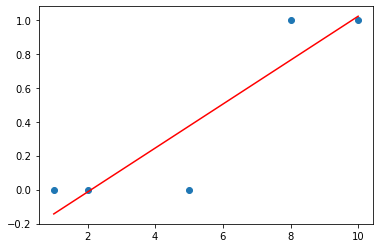

In [95]:
# logistic Regression이 필요한 이유(기존의 linear regression으로는 안 되는 이유)
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x = np.array([1,2,5,8,10])
y = np.array([0,0,0,1,1])
lm = stats.linregress(x, y)
print('w값은 ', lm[0], ',b값은 ', lm[1])
plt.scatter(x, y)
plt.plot(x, x*lm[0]+lm[1], 'r')

w값은  0.03500583430571762 ,b값은  0.1732788798133022


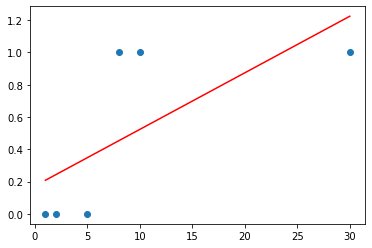

In [96]:
# logistic Regression이 필요한 이유(기존의 linear regression으로는 안 되는 이유)
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x = np.array([1,2,5,8,10,30])
y = np.array([0,0,0,1,1,1])
lm = stats.linregress(x, y)
print('w값은 ', lm[0], ',b값은 ', lm[1])
plt.scatter(x, y)
plt.plot(x, x*lm[0]+lm[1], 'r')

In [7]:
# 교안 pt.51부터
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
# training data set
x_data = np.array([[10,0],
                   [8,1],
                   [3,3],
                   [2,3],
                   [5,1],
                   [2,0],
                   [1,0]])
y_data = np.array([[1],[1],[1],[1],[0],[0],[0]])

# placeholder
X = tf.placeholder(shape=[None,2], dtype=tf.float32)
Y = tf.placeholder(shape=[None,1], dtype=tf.float32)

# Weight(2행1열) & bias(1개)
W = tf.Variable(tf.random_normal([2,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
# logits = X @ W + b
logits = tf.matmul(X, W) + b
H = tf.sigmoid(logits)

# cost function
# cost = tf.reduce_mean(tf.square(H - Y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                        labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 3001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step%300 == 0:
        print("{}번째 cost : {}".format(step, cost_val))
# 학습이 잘 되었는지 확인
# Accuracy
predict = tf.cast(H>0.5, dtype=tf.float32)
correct = tf.equal(predict, Y) # True True True True False True True
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('정확도 :',sess.run(accuracy, feed_dict={X:x_data, Y:y_data}) )

300번째 cost : 0.2797684371471405
600번째 cost : 0.226466104388237
900번째 cost : 0.19984284043312073
1200번째 cost : 0.18191489577293396
1500번째 cost : 0.16815365850925446
1800번째 cost : 0.15684954822063446
2100번째 cost : 0.1471954882144928
2400번째 cost : 0.13875049352645874
2700번째 cost : 0.1312459409236908
3000번째 cost : 0.12450401484966278
정확도 : 1.0


In [10]:
# 예측
print('H결과 :',sess.run(H, feed_dict={X:[[3,3]]} ))
print('predict 결과 :',sess.run(predict, feed_dict={X:[[3,3]]} ))

H결과 : [[0.9650091]]
predict 결과 : [[1.]]


# 6. multinomial classification(3개이상 그룹)
- 퀴즈 1,2,3 성적과 출석에 따른 A, B, C 등급 분류

In [12]:
# training data set(교안 pt.54)
x_data = [[10,7,8,5],
          [8,8,9,4],
          [7,8,2,3],
          [6,3,9,3],
          [7,5,7,4],
          [3,5,6,2],
          [2,4,3,1]]
# 종속변수는 multinomial classification에서는 원핫인코딩(교안pt.58)
y_data =[[1, 0, 0],
         [1, 0, 0],
         [0, 1, 0],
         [0, 1, 0],
         [0, 1, 0],
         [0, 0, 1],
         [0, 0, 1]]
# placeholder
X = tf.placeholder(shape=[None, 4], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 3], dtype=tf.float32)

# Weight(4x3행렬) , bias(3개)
W = tf.Variable(tf.random_normal([4,3]), name="weight")
b = tf.Variable(tf.random_normal([3])  , name="bias")

# Hypothesis
# logits = X @ W + b
logits = tf.matmul(X, W) + b
# H = tf.nn.sigmoid(logits)
H = tf.nn.softmax(logits) # softmax분류분석 최종단계에서 결과의 합이 1이 되도록

# cost function
# cost = tf.reduce_mean(tf.square(H - Y))
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                        labels=Y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 6001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step%300 == 0:
        print("{}번째 cost : {}".format(step, cost_val))

300번째 cost : 1.1712361574172974
600번째 cost : 0.9021403193473816
900번째 cost : 0.6666759848594666
1200번째 cost : 0.5538122057914734
1500번째 cost : 0.49668893218040466
1800번째 cost : 0.05605877563357353
2100번째 cost : 0.0490470826625824
2400번째 cost : 0.04476248845458031
2700번째 cost : 0.041569553315639496
3000번째 cost : 0.03900107741355896
3300번째 cost : 0.03683843836188316
3600번째 cost : 0.0349636971950531
3900번째 cost : 0.03330614045262337
4200번째 cost : 0.031820397824048996
4500번째 cost : 0.030475158244371414
4800번째 cost : 0.0292478296905756
5100번째 cost : 0.02812121994793415
5400번째 cost : 0.02708197757601738
5700번째 cost : 0.026119273155927658
6000번째 cost : 0.02522439882159233


In [15]:
# 예측
result = sess.run(H, feed_dict={X:[[8,8,9,4]]})
print(result)
print(result.argmax(axis=1)) # 0번째 열만 1

[[0.97769713 0.01968048 0.00262235]]
[0]


In [19]:
# accuracy 측정.
# H => 0.97 0.19 0.002을 경우 H.argmax => 0
# Y -> 1    0    0    을 경우 Y.argmax => 0
predict = tf.argmax(H, axis=1) # 어떤 열의 값이 제일 큰지 index반환
correct = tf.equal(predict, tf.argmax(Y, 1))
# print(sess.run(correct, feed_dict={X:x_data, Y:y_data}))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print(sess.run(accuracy, feed_dict={X:x_data, Y:y_data})*100, '%')

100.0 %


# 7. XOR(교안 pt.77)

In [31]:
# training data set
x_data = [[0,0], [0,1], [1,0], [1,1]]
y_data = [[0],   [1],   [1],   [0]]
# placeholder
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([2,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")
# Hypothesis
# H = X@W + b
logits = tf.matmul(X, W) + b
H = tf.sigmoid(logits)

# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=Y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 3001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step%300 == 0:
        print("{}번째 cost : {}".format(step, cost_val))
# accuracy 측정
predict = tf.cast(H>0.5, dtype=tf.float32)
correct = tf.equal(predict, Y) # False True False True
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('정확도 :', sess.run(accuracy, feed_dict={X:x_data, Y:y_data}))

300번째 cost : 0.7475399971008301
600번째 cost : 0.7239876389503479
900번째 cost : 0.7162603735923767
1200번째 cost : 0.711338996887207
1500번째 cost : 0.7075478434562683
1800번째 cost : 0.7045468091964722
2100번째 cost : 0.7021661996841431
2400번째 cost : 0.7002792358398438
2700번째 cost : 0.6987850666046143
3000번째 cost : 0.6976026296615601
정확도 : 0.25


In [24]:
# predict
predict = tf.cast(H>0.5, dtype=tf.float32)
print(sess.run(predict, feed_dict={X:x_data} ) )

[[1.]
 [1.]
 [0.]
 [0.]]


# 8. Deep Learning XOR 예제

In [32]:
# training data set
x_data = [[0,0], [0,1], [1,0], [1,1]]
y_data = [[0],   [1],   [1],   [0]]
# placeholder
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# layer 추가
# Weight & bias(layer1= 입력2개 출력 4)
W1 = tf.Variable(tf.random_normal([2,4]), name="weight1")
b1 = tf.Variable(tf.random_normal([4]), name="bias1")
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)
# Weight & bias(layer2 = 입력4개, 출력1개)
W2 = tf.Variable(tf.random_normal([4,1]), name="weight2")
b2 = tf.Variable(tf.random_normal([1]), name="bias2")

# Hypothesis
logits = tf.matmul(layer1, W2) + b2
H = tf.sigmoid(logits)

# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=Y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 3001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step%300 == 0:
        print("{}번째 cost : {}".format(step, cost_val))
# accuracy 측정
predict = tf.cast(H>0.5, dtype=tf.float32)
correct = tf.equal(predict, Y) # False True False True
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('정확도 :', sess.run(accuracy, feed_dict={X:x_data, Y:y_data}))

300번째 cost : 0.7120675444602966
600번째 cost : 0.7056372761726379
900번째 cost : 0.7015881538391113
1200번째 cost : 0.6981494426727295
1500번째 cost : 0.695100724697113
1800번째 cost : 0.6923468112945557
2100번째 cost : 0.6898166537284851
2400번째 cost : 0.6874524354934692
2700번째 cost : 0.6852058172225952
3000번째 cost : 0.6830363273620605
정확도 : 0.5


In [40]:
# training data set
x_data = [[0,0], [0,1], [1,0], [1,1]]
y_data = [[0],   [1],   [1],   [0]]
# placeholder
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# layer 추가
# Weight & bias(layer1= 입력2개 출력 10)
W1 = tf.Variable(tf.random_normal([2,10]), name="weight1")
b1 = tf.Variable(tf.random_normal([10]), name="bias1")
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

# Weight & bias(layer2 = 입력10개, 출력20개)
W2 = tf.Variable(tf.random_normal([10,20]), name="weight2")
b2 = tf.Variable(tf.random_normal([20]), name="bias2")
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

# Weight & bias(layer3 = 입력20개, 출력 10)
W3 = tf.Variable(tf.random_normal([20,10]), name="weight3")
b3 = tf.Variable(tf.random_normal([10]), name="bias3")
layer3 = tf.nn.relu(tf.matmul(layer2, W3)+b3)

# Weight & bias(output layer = 입력10개, 출력1)
W4 = tf.Variable(tf.random_normal([10,1]), name="weight4")
b4 = tf.Variable(tf.random_normal([1]), name="bias4")

# Hypothesis
logits = tf.matmul(layer3, W4) + b4
H = tf.sigmoid(logits)

# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,
                                                             labels=Y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 3001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step%300 == 0:
        print("{}번째 cost : {}".format(step, cost_val))
# accuracy 측정
predict = tf.cast(H>0.5, dtype=tf.float32)
correct = tf.equal(predict, Y) # False True False True
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print('정확도 :', sess.run(accuracy, feed_dict={X:x_data, Y:y_data}))

300번째 cost : 0.020221572369337082
600번째 cost : 0.007499051745980978
900번째 cost : 0.0043118176981806755
1200번째 cost : 0.002976219402626157
1500번째 cost : 0.002234631683677435
1800번째 cost : 0.0017726717051118612
2100번째 cost : 0.0014617728302255273
2400번째 cost : 0.0012394721852615476
2700번째 cost : 0.001072373823262751
3000번째 cost : 0.0009424936142750084
정확도 : 1.0
